Intial weight:  1506.0252808187633
Minimum weight:  1280.1261931093638
Improvement:  15.0 %


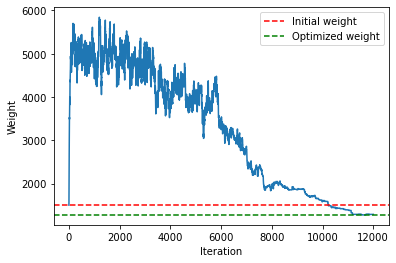

In [105]:

from nodes_generator import NodeGenerator
from simulated_annealing import SimulatedAnnealing

'''set the simulated annealing algorithm params'''
temp = 1000
stopping_temp = 0.00000001
alpha = 0.9995
stopping_iter = 12000

'''set the dimensions of the grid'''
size_width = 200
size_height = 200

'''set the number of nodes'''
population_size = 50

'''generate random list of nodes'''
nodes = NodeGenerator(size_width, size_height, population_size).generate()

'''run simulated annealing algorithm with 2-opt'''
sa = SimulatedAnnealing(nodes, temp, alpha, stopping_temp, stopping_iter)
sa.anneal()

'''animate'''
#sa.animateSolutions()

'''show the improvement over time'''
sa.plotLearning()


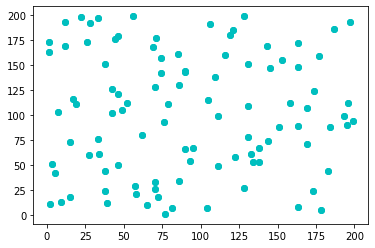

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import numpy as np

history = sa.solution_history
points = sa.coords
key_frames_mult = len(history) //50

fig, ax = plt.subplots()

''' path is a line coming through all the nodes '''
line, = plt.plot([], [], lw=2)

def init():
    ''' initialize node dots on graph '''
    x = [points[i][0] for i in history[0]]
    y = [points[i][1] for i in history[0]]
    plt.plot(x, y, 'co')

    ''' draw axes slighty bigger  '''
    extra_x = (max(x) - min(x)) * 0.05
    extra_y = (max(y) - min(y)) * 0.05
    ax.grid()
    ax.set_xlim(min(x) - extra_x, max(x) + extra_x)
    ax.set_ylim(min(y) - extra_y, max(y) + extra_y)

    '''initialize solution to be empty '''
    line.set_data([], [])
    return line,

def update(frame):
    ''' for every frame update the solution on the graph '''
    x = [points[i, 0] for i in history[frame] + [history[frame][0]]]
    y = [points[i, 1] for i in history[frame] + [history[frame][0]]]
    line.set_data(x, y)
    return line

''' animate precalulated solutions '''

ani = FuncAnimation(fig, update, frames=range(0, len(history), key_frames_mult),
                    init_func=init, interval=500, repeat=False)


#plt.show()
ani.save('sa.gif', writer='pillow')